In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/cancer.csv')

In [3]:
df.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Cancer_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,6.2
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,5.0
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,6.2
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.0
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.8


In [4]:
df.set_index('CensusTract', inplace=True)


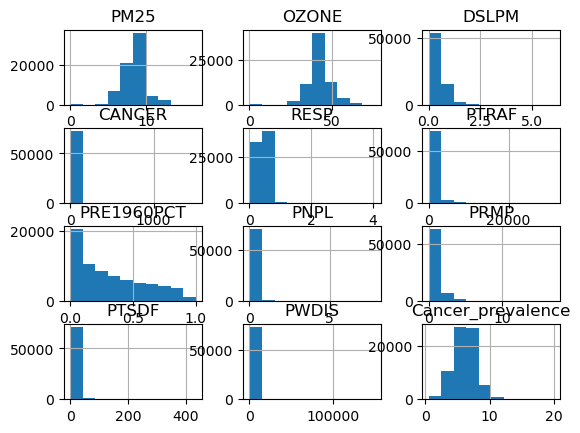

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('Cancer_prevalence', axis=1, inplace=True)
y = df['Cancer_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

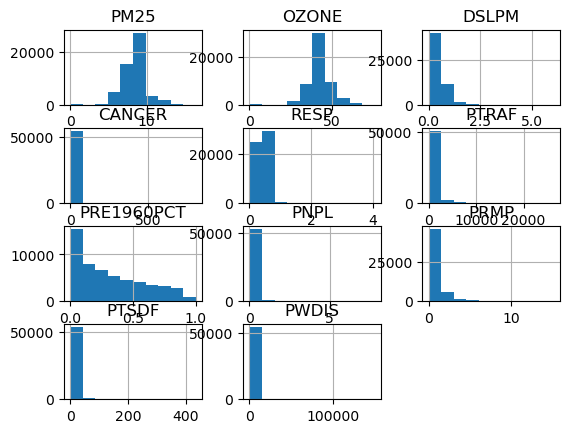

In [8]:
X_train.hist()
plt.show()

In [9]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
12095017016,8.947239,34.461667,0.596474,36.469769,0.562358,43.101867,0.009710,0.045227,0.800494,0.623067,0.000054
36103146206,6.644049,43.633522,0.642413,25.487909,0.358018,2258.124038,0.465510,0.252945,0.226540,2.069586,0.000000
39061009600,9.685161,46.267325,0.936223,32.655827,0.464191,332.589894,0.635153,0.054070,1.889720,1.248625,0.013151
6073003211,9.586768,43.133933,0.434802,37.630175,0.497908,24.201700,0.524065,0.013390,0.465606,2.723068,49.829670
47131965400,8.154197,43.808219,0.199462,29.096532,0.412679,50.144269,0.233456,0.016974,0.587134,0.061471,0.001203


In [10]:
# Saving data without normalization

X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer')

In [12]:
# Taking the log of the data in X_train that are not close to being normally distributed
X_train_log = X_train.copy()

pt = PowerTransformer()
pt.fit(X_train_log[['DSLPM']])
X_train_log['DSLPM'] = pt.transform(X_train_log[['DSLPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['CANCER']])
X_train_log['CANCER'] = pt1.transform(X_train_log[['CANCER']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

y_train_log = y_train.copy()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)

pt9 = PowerTransformer()
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

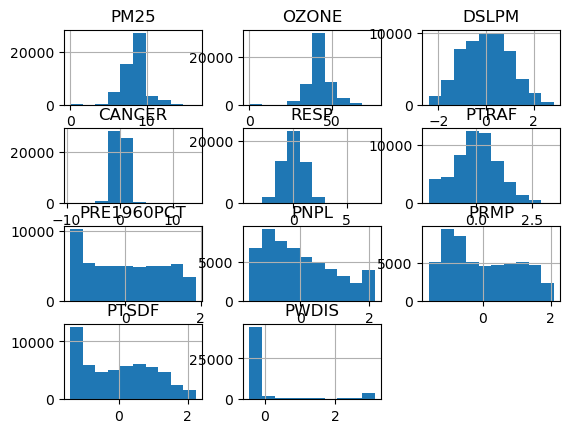

In [13]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed.

In [14]:
X_test_log = X_test.copy()

In [15]:
X_train_log.drop('PWDIS', axis=1, inplace=True)


X_test_log.drop('PWDIS', axis=1, inplace=True)

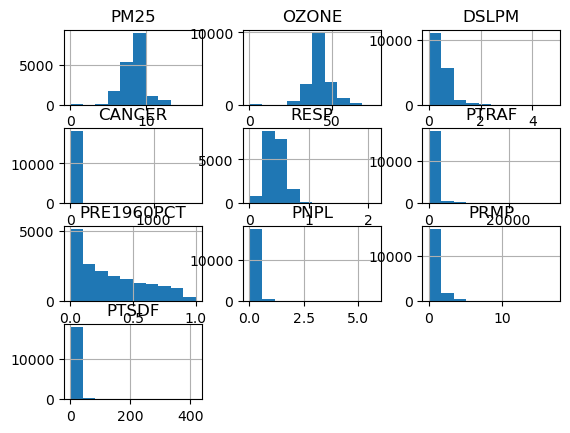

In [16]:
X_test_log.hist()
plt.show()

In [18]:
# Transforming the test data using the PowerTransformer fit on the training data
X_test_log['DSLPM'] = pt.transform(X_test_log[['DSLPM']])

X_test_log['CANCER'] = pt1.transform(X_test_log[['CANCER']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

(18081,)

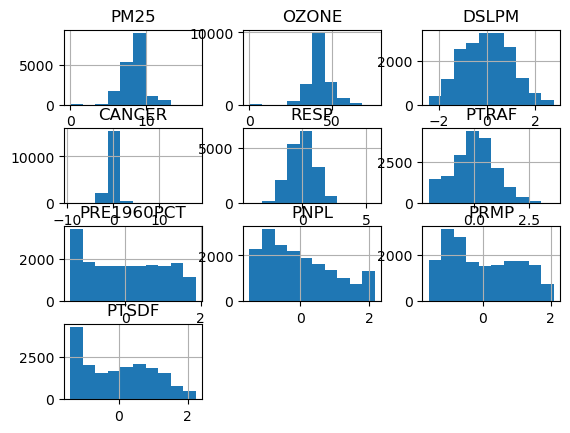

In [19]:
X_test_log.hist()
plt.show()

In [20]:
# Saving data transformed by power transformer

X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_cancer')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_cancer')
y_test_log = pd.Series(y_test_log)
y_train_log = pd.Series(y_train_log)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_cancer')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_cancer')

### Asthma data should now be ready to model